# Zadatak 5: Implementacija klasifikacije

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from zadatak5_knn import KNN

### Učitavanje podataka

In [2]:
df = pd.read_csv('./db/scrapy_vozila_20220602.csv', sep=';', names=['url', 'naslov', 'cena', 'stanje', 'marka', 'model', 'godiste', 'kilometraza', 'karoserija', 'gorivo', 'kubikaza', 'snaga', 'menjac', 'vrata', 'boja', 'lokacija_prodavca'])

df

,url,naslov,cena,stanje,marka,model,godiste,kilometraza,karoserija,gorivo,kubikaza,snaga,menjac,vrata,boja,lokacija_prodavca
0,https://www.polovniautomobili.com/auto-oglasi/...,Fiat 500 14 16v SPORT CH,4599,Polovno vozilo,Fiat,500,2008,150661,Hečbek,Benzin,1400,74/101 (kW/KS),Manuelni 6 brzina,2/3 vrata,Siva,Vidikovac
1,https://www.polovniautomobili.com/auto-oglasi/...,Peugeot 508 2.0,8950,Polovno vozilo,Peugeot,508,2015,187000,Karavan,Dizel,1997,120/163 (kW/KS),Automatski / poluautomatski,4/5 vrata,Siva,Vidikovac
2,https://www.polovniautomobili.com/auto-oglasi/...,Hyundai Tucson 2.0 CRDI 4WD,4600,Polovno vozilo,Hyundai,Tucson,2006,231000,Džip/SUV,Dizel,1998,82/111 (kW/KS),Manuelni 5 brzina,4/5 vrata,Zlatna,Vidikovac
3,https://www.polovniautomobili.com/auto-oglasi/...,Volkswagen Golf 7 GTD,17000,Polovno vozilo,Volkswagen,Golf 7,2016,122000,Hečbek,Dizel,1968,135/184 (kW/KS),Manuelni 6 brzina,4/5 vrata,Crna,Vidikovac
4,https://www.polovniautomobili.com/auto-oglasi/...,Opel Antara 2.0 CDTI 4WD COSMO,5600,Polovno vozilo,Opel,Antara,2007,204000,Džip/SUV,Dizel,1991,110/150 (kW/KS),Manuelni 5 brzina,4/5 vrata,Crna,Vidikovac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,https://www.polovniautomobili.com/auto-oglasi/...,Toyota Avensis,2800,Polovno vozilo,Toyota,Avensis,2004,288000,Limuzina,Dizel,1995,85/116 (kW/KS),Manuelni 5 brzina,4/5 vrata,Zlatna,Niš
31652,https://www.polovniautomobili.com/auto-oglasi/...,Honda Civic 1.8 GT,8000,Polovno vozilo,Honda,Civic,2010,205000,Hečbek,Benzin,1799,103/140 (kW/KS),Manuelni 6 brzina,4/5 vrata,Crna,Niš
31653,https://www.polovniautomobili.com/auto-oglasi/...,Volkswagen Golf 5 1.9tdi 9,4450,Polovno vozilo,Volkswagen,Golf 5,2007,346567,Hečbek,Dizel,1896,77/105 (kW/KS),Manuelni 6 brzina,4/5 vrata,Teget,Niš
31654,https://www.polovniautomobili.com/auto-oglasi/...,Mercedes Benz A 180 A 180 cdi DCT,14800,Polovno vozilo,Mercedes Benz,A 180,2013,153000,Hečbek,Dizel,1796,80/109 (kW/KS),Automatski / poluautomatski,4/5 vrata,Siva,Niš


In [3]:
df.dtypes

url                  object
naslov               object
cena                 object
stanje               object
marka                object
model                object
godiste               int64
kilometraza           int64
karoserija           object
gorivo               object
kubikaza              int64
snaga                object
menjac               object
vrata                object
boja                 object
lokacija_prodavca    object
dtype: object

### Uklanjanje nenumeričkih vrednosti cena i snage

In [4]:
# Cena
df = df.loc[pd.to_numeric(df['cena'], errors='coerce').notnull()]
df.loc[:, 'cena'] = df.loc[:, 'cena'].astype('int64')


# Snaga - zadrzava se brojka u konjskim snagama
def sredi_snagu(snaga: str) -> str:
    try:
        return re.search('(?<=/)\d+', snaga).group(0)
    except AttributeError:
        return None

df['snaga'] = df['snaga'].apply(sredi_snagu)

df = df.loc[pd.to_numeric(df['snaga'], errors='coerce').notnull()]
df.loc[:, 'snaga'] = df.loc[:, 'snaga'].astype('int64')

C:\Users\kifla\AppData\Local\Temp\ipykernel_15696\735780608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cena'] = df.loc[:, 'cena'].astype('int64')
C:\Users\kifla\AppData\Local\Temp\ipykernel_15696\735780608.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snaga'] = df['snaga'].apply(sredi_snagu)


In [5]:
df.dtypes

url                  object
naslov               object
cena                  int64
stanje               object
marka                object
model                object
godiste               int64
kilometraza           int64
karoserija           object
gorivo               object
kubikaza              int64
snaga                 int64
menjac               object
vrata                object
boja                 object
lokacija_prodavca    object
dtype: object

In [6]:
df.shape

(30487, 16)

### Dodeljivanje kategorije cenovnog opsega vozilima.

In [7]:
bins = [0, 2000, 5000, 10000, 15000, 20000, 25000, 30000, math.inf] # math.inf or np.inf?
labels = ['<=1999', '2000-4999', '5000-9999', '10000-14999', '15000-19999', '20000-24999', '25000-29999', '>=30000']
df['cenovni_opseg'] = pd.cut(df['cena'], bins=bins, labels=labels, right=False)

df

,url,naslov,cena,stanje,marka,model,godiste,kilometraza,karoserija,gorivo,kubikaza,snaga,menjac,vrata,boja,lokacija_prodavca,cenovni_opseg
0,https://www.polovniautomobili.com/auto-oglasi/...,Fiat 500 14 16v SPORT CH,4599,Polovno vozilo,Fiat,500,2008,150661,Hečbek,Benzin,1400,101,Manuelni 6 brzina,2/3 vrata,Siva,Vidikovac,2000-4999
1,https://www.polovniautomobili.com/auto-oglasi/...,Peugeot 508 2.0,8950,Polovno vozilo,Peugeot,508,2015,187000,Karavan,Dizel,1997,163,Automatski / poluautomatski,4/5 vrata,Siva,Vidikovac,5000-9999
2,https://www.polovniautomobili.com/auto-oglasi/...,Hyundai Tucson 2.0 CRDI 4WD,4600,Polovno vozilo,Hyundai,Tucson,2006,231000,Džip/SUV,Dizel,1998,111,Manuelni 5 brzina,4/5 vrata,Zlatna,Vidikovac,2000-4999
3,https://www.polovniautomobili.com/auto-oglasi/...,Volkswagen Golf 7 GTD,17000,Polovno vozilo,Volkswagen,Golf 7,2016,122000,Hečbek,Dizel,1968,184,Manuelni 6 brzina,4/5 vrata,Crna,Vidikovac,15000-19999
4,https://www.polovniautomobili.com/auto-oglasi/...,Opel Antara 2.0 CDTI 4WD COSMO,5600,Polovno vozilo,Opel,Antara,2007,204000,Džip/SUV,Dizel,1991,150,Manuelni 5 brzina,4/5 vrata,Crna,Vidikovac,5000-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,https://www.polovniautomobili.com/auto-oglasi/...,Toyota Avensis,2800,Polovno vozilo,Toyota,Avensis,2004,288000,Limuzina,Dizel,1995,116,Manuelni 5 brzina,4/5 vrata,Zlatna,Niš,2000-4999
31652,https://www.polovniautomobili.com/auto-oglasi/...,Honda Civic 1.8 GT,8000,Polovno vozilo,Honda,Civic,2010,205000,Hečbek,Benzin,1799,140,Manuelni 6 brzina,4/5 vrata,Crna,Niš,5000-9999
31653,https://www.polovniautomobili.com/auto-oglasi/...,Volkswagen Golf 5 1.9tdi 9,4450,Polovno vozilo,Volkswagen,Golf 5,2007,346567,Hečbek,Dizel,1896,105,Manuelni 6 brzina,4/5 vrata,Teget,Niš,2000-4999
31654,https://www.polovniautomobili.com/auto-oglasi/...,Mercedes Benz A 180 A 180 cdi DCT,14800,Polovno vozilo,Mercedes Benz,A 180,2013,153000,Hečbek,Dizel,1796,109,Automatski / poluautomatski,4/5 vrata,Siva,Niš,10000-14999


### Odabir relevantnih podataka i pretvaranje kategoričkih vrednosti u numeričke

In [8]:
df_for_training = df.copy()

features_to_exclude = ['cena', 'url', 'naslov', 'model', 'karoserija', 'gorivo', 'menjac', 'vrata', 'boja', 'lokacija_prodavca']
df_for_training = df_for_training.drop(features_to_exclude, axis=1)

categorical_features = ['cenovni_opseg', 'stanje', 'marka']
df_for_training = pd.get_dummies(df_for_training, columns=categorical_features)

df_for_training

,godiste,kilometraza,kubikaza,snaga,cenovni_opseg_<=1999,cenovni_opseg_2000-4999,cenovni_opseg_5000-9999,cenovni_opseg_10000-14999,cenovni_opseg_15000-19999,cenovni_opseg_20000-24999,...,marka_Toyota,marka_Trabant,marka_UAZ,marka_Vauxhall,marka_Volkswagen,marka_Volvo,marka_Wartburg,marka_Zastava,marka_ZhiDou,marka_Škoda
0,2008,150661,1400,101,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,187000,1997,163,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006,231000,1998,111,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,122000,1968,184,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2007,204000,1991,150,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,2004,288000,1995,116,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31652,2010,205000,1799,140,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31653,2007,346567,1896,105,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31654,2013,153000,1796,109,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Skaliranje numeričkih podataka

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['godiste', 'kilometraza', 'kubikaza', 'snaga']
scaler.fit(df_for_training[numeric_features])
scaled_features = scaler.transform(df_for_training[numeric_features])
for i in range(len(numeric_features)):
    df_for_training[numeric_features[i]] = scaled_features[:, i]
    
df_for_training

,godiste,kilometraza,kubikaza,snaga,cenovni_opseg_<=1999,cenovni_opseg_2000-4999,cenovni_opseg_5000-9999,cenovni_opseg_10000-14999,cenovni_opseg_15000-19999,cenovni_opseg_20000-24999,...,marka_Toyota,marka_Trabant,marka_UAZ,marka_Vauxhall,marka_Volkswagen,marka_Volvo,marka_Wartburg,marka_Zastava,marka_ZhiDou,marka_Škoda
0,-0.089751,-0.343189,-0.044211,-0.440034,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.060758,-0.077278,0.007066,0.758765,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.418468,0.244693,0.007152,-0.246679,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.225117,-0.552917,0.004575,1.164810,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.254110,0.047120,0.006551,0.507404,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,-0.747185,0.661791,0.006894,-0.150002,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31652,0.238966,0.054437,-0.009940,0.314049,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31653,-0.254110,1.090356,-0.001609,-0.362692,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31654,0.732041,-0.326074,-0.010198,-0.285350,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## KNN - priprema/konfigurisanje

### Podela podataka

In [10]:
#DATA_COUNT = df.shape[0]    
DATA_COUNT = 2000   # Zbog performansi i lakšeg uočavanja rezultata optimizacije, može se koristiti manji udeo podataka
xtrain, xtest, ytrain, ytest = train_test_split(df_for_training[:DATA_COUNT], df['cenovni_opseg'][:DATA_COUNT], test_size=0.30, random_state=183)

### Računanje K (standardan način - neparan broj najbliži korenu broja podataka)

In [11]:
K = KNN.compute_k(xtrain.shape[0])

K

37

In [12]:
METRIC = 'euclidean'

### Funkcija za treniranje i primenu KNN

In [13]:
def train_and_predict(knn_cls, k: int, metric: str, xtrain, xtest, ytrain, ytest, output: bool = True):
    knn = knn_cls(n_neighbors=k, metric=metric)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    
    if output:
        print(f"K = {k}, metric = {metric}")
        print(confusion_matrix(ytest, ypred))
        print(classification_report(ytest, ypred))
        
    return ypred

### Funkcija za traženje optimalne vrednosti K

In [14]:
def find_optimal_k(KNN_cls, K_min: int, K_max: int, metric: str, xtrain, xtest, ytrain, ytest) -> int:
    if (K_min % 2 == 0) or (K_max % 2 == 0):
        raise ValueError("K_min and K_max must be odd numbers")
    
    K_values = []
    error_rate = []
    
    for i in range(K_min, K_max + 1, 2):
        pred_i = train_and_predict(KNN_cls, i, metric, xtrain, xtest, ytrain, ytest, output=False)
        K_values.append(i)
        error_rate.append(np.mean(pred_i != ytest)) # pred_i != ytest returns a list of bool values, whose mean is calculated by turning every True into 1 and False into 0

    # Draw plot
    plt.figure(figsize=(20, 10))
    plt.plot(K_values, error_rate, color='blue', marker='o', markerfacecolor='red', markersize=6)
    [plt.annotate(str(k), xy=(k, err)) for k, err in zip(K_values, error_rate)]
    plt.title('Error rate vs. K value')
    plt.xlabel('K')
    plt.ylabel('Error rate')
    
    return K_values[len(error_rate) - 1 - error_rate[::-1].index(min(error_rate))]    # return largest K value for which the error rate is minimal

## KNN - korišćenjem bibliotečke implementacije

In [15]:
pred = train_and_predict(KNeighborsClassifier, K, METRIC, xtrain, xtest, ytrain, ytest, output=True)

K = 37, metric = euclidean
[[ 77   0   0   0   0   0   0   0]
 [  0  40   0   0   0   0   0   1]
 [  1   0 237   0   0   0   0   0]
 [  2   0   0  17   0   0   0   1]
 [  3   1   0   0   4   0   0   0]
 [  0   0   0   0   0 163   0   0]
 [  0   0   8   0   0   0  15   0]
 [  0   0   0   0   0   0   0  30]]
              precision    recall  f1-score   support

 10000-14999       0.93      1.00      0.96        77
 15000-19999       0.98      0.98      0.98        41
   2000-4999       0.97      1.00      0.98       238
 20000-24999       1.00      0.85      0.92        20
 25000-29999       1.00      0.50      0.67         8
   5000-9999       1.00      1.00      1.00       163
      <=1999       1.00      0.65      0.79        23
     >=30000       0.94      1.00      0.97        30

    accuracy                           0.97       600
   macro avg       0.98      0.87      0.91       600
weighted avg       0.97      0.97      0.97       600



### Odabir i primena optimalne vrednosti K (može da potraje)

K = 5, metric = euclidean
[[ 77   0   0   0   0   0   0   0]
 [  0  41   0   0   0   0   0   0]
 [  0   0 238   0   0   0   0   0]
 [  0   0   0  20   0   0   0   0]
 [  1   0   0   0   7   0   0   0]
 [  0   0   0   0   0 163   0   0]
 [  0   0   3   0   0   0  20   0]
 [  0   0   0   0   0   0   0  30]]
              precision    recall  f1-score   support

 10000-14999       0.99      1.00      0.99        77
 15000-19999       1.00      1.00      1.00        41
   2000-4999       0.99      1.00      0.99       238
 20000-24999       1.00      1.00      1.00        20
 25000-29999       1.00      0.88      0.93         8
   5000-9999       1.00      1.00      1.00       163
      <=1999       1.00      0.87      0.93        23
     >=30000       1.00      1.00      1.00        30

    accuracy                           0.99       600
   macro avg       1.00      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



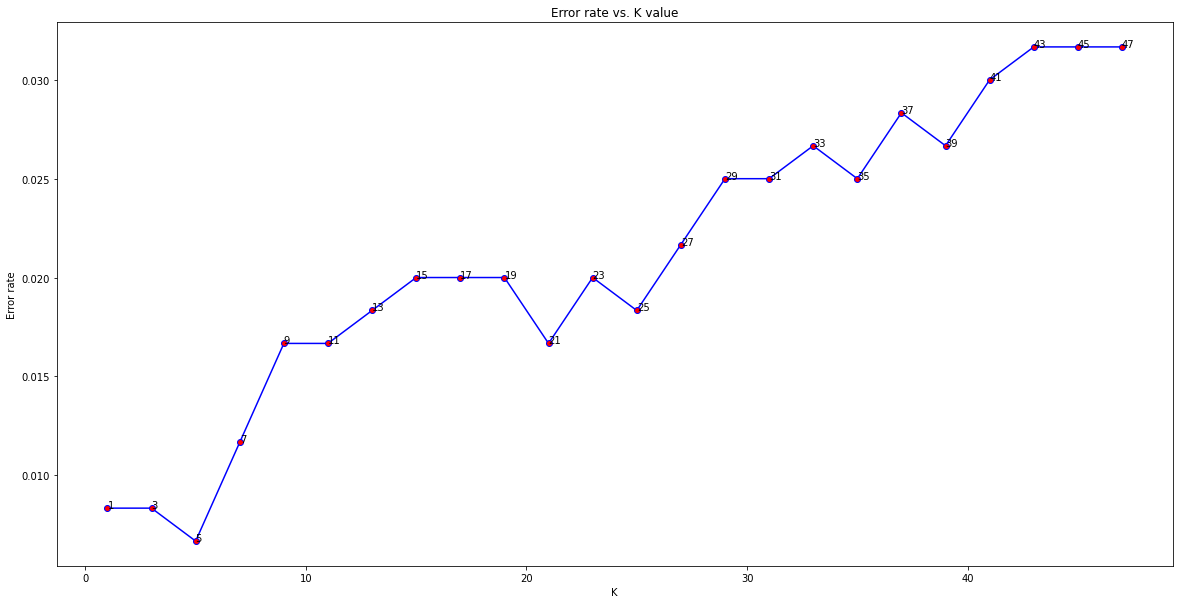

In [16]:
K_min, K_max = 1, K + 10
K_optimal = find_optimal_k(KNeighborsClassifier, K_min, K_max, METRIC, xtrain, xtest, ytrain, ytest)
pred = train_and_predict(KNeighborsClassifier, K_optimal, METRIC, xtrain, xtest, ytrain, ytest, output=True)

## Baseline

### Baseline - izlaz je najfrekventnija klasa

In [17]:
from sklearn.metrics import accuracy_score

most_frequent_cateogry = df['cenovni_opseg'][:DATA_COUNT].mode()[0]
ypred_baseline_freq = [most_frequent_cateogry] * len(ytest)
accuracy_score(ytest, ypred_baseline_freq)

0.39666666666666667

### Baseline - izlaz je random klasa

In [18]:
import random

random.seed(183)
categories = list(df['cenovni_opseg'][:DATA_COUNT].value_counts().keys())
ypred_baseline_rand = [random.choice(categories) for i in range(ytest.shape[0])]
accuracy_score(ytest, ypred_baseline_rand)

0.13833333333333334

## KNN - korišćenjem sopstvene implementacije (može da potraje)

In [19]:
pred = train_and_predict(KNN, K, METRIC, xtrain, xtest, ytrain, ytest, output=True)

K = 37, metric = euclidean
[[ 77   0   0   0   0   0   0   0]
 [  0  40   0   0   0   0   0   1]
 [  1   0 237   0   0   0   0   0]
 [  2   0   0  17   0   0   0   1]
 [  2   1   0   0   4   0   0   1]
 [  0   0   0   0   0 163   0   0]
 [  0   0   6   0   0   0  17   0]
 [  0   0   0   0   0   0   0  30]]
              precision    recall  f1-score   support

 10000-14999       0.94      1.00      0.97        77
 15000-19999       0.98      0.98      0.98        41
   2000-4999       0.98      1.00      0.99       238
 20000-24999       1.00      0.85      0.92        20
 25000-29999       1.00      0.50      0.67         8
   5000-9999       1.00      1.00      1.00       163
      <=1999       1.00      0.74      0.85        23
     >=30000       0.91      1.00      0.95        30

    accuracy                           0.97       600
   macro avg       0.97      0.88      0.91       600
weighted avg       0.98      0.97      0.97       600



In [20]:
pred = train_and_predict(KNN, K_optimal, METRIC, xtrain, xtest, ytrain, ytest, output=True)

K = 5, metric = euclidean
[[ 77   0   0   0   0   0   0   0]
 [  0  41   0   0   0   0   0   0]
 [  0   0 238   0   0   0   0   0]
 [  0   0   0  20   0   0   0   0]
 [  1   0   0   0   7   0   0   0]
 [  0   0   0   0   0 163   0   0]
 [  0   0   3   0   0   0  20   0]
 [  0   0   0   0   0   0   0  30]]
              precision    recall  f1-score   support

 10000-14999       0.99      1.00      0.99        77
 15000-19999       1.00      1.00      1.00        41
   2000-4999       0.99      1.00      0.99       238
 20000-24999       1.00      1.00      1.00        20
 25000-29999       1.00      0.88      0.93         8
   5000-9999       1.00      1.00      1.00       163
      <=1999       1.00      0.87      0.93        23
     >=30000       1.00      1.00      1.00        30

    accuracy                           0.99       600
   macro avg       1.00      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600

